#SVM AND DECISION TREE

1. Linear Separability (Binary Classification)
Dataset: svm_linear.csv (200 rows, 2 features)
Task: Train an SVM with linear kernel to classify data into two classes.
Report accuracy and decision boundary.

Accuracy: 0.975


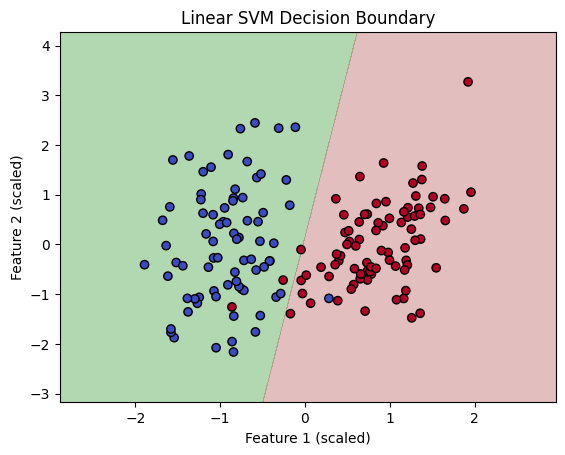

In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df=pd.read_csv('svm_linear.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=SVC(kernel='linear')
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

#finding slope and intercept
w=model.coef_
b=model.intercept_

#x_min,x_max,y_min,y_max --> sets the boundary of the graph
x_min,x_max=X_train_scaled[:,0].min()-1,X_train_scaled[:,0].max()+1
y_min,y_max=X_train_scaled[:,1].min()-1,X_train_scaled[:,1].max()+1
#meshgrid --> it takes 2 1D arrays and creates a coordinate grid
xx,yy=np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))

#ravel --> converts 2D into 1D array
#np.c_ --> combines the flattened array into coordinate pairs like [[x1,y1],[x2,y2],...]
#model.decision_function --> computes the distance from the decision boundary for each point
Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

#contourf --> draws the colored class region
#alpha --> transparency of the color (0=fully transparent, 1=solid)
#plt.contourf --> uses Z to color regions based on value ranges.
plt.contourf(xx,yy,Z,levels=[-np.inf,0,np.inf],alpha=0.3,colors=['green','brown'])
#c= --> specifies the color of each data point and c=y_train --> assigns color based on class
#edgecolors --> adds an outline (border) to each dot and k represents black border
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap='coolwarm',edgecolors='k')   
plt.title('Linear SVM Decision Boundary')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.savefig('plots/linear_svm.png')
plt.show()

2. Effect of Kernel (Binary Classification)
Dataset: svm_kernel.csv (200 rows, circular pattern)
Task: Train SVM with linear kernel and SVM with RBF kernel. Compare performance.

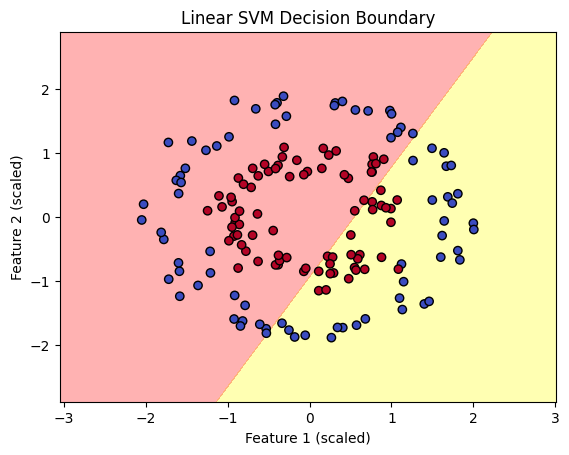

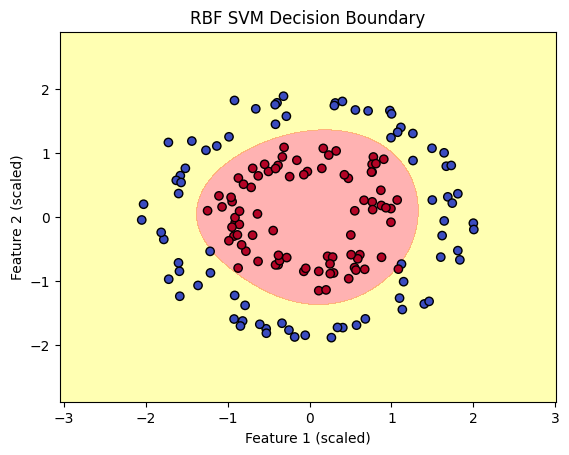

In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df=pd.read_csv('svm_kernel.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

kernels=['linear','rbf']
titles=['Linear SVM','RBF SVM']
for kernel,title in zip(kernels,titles):
  model=SVC(kernel=kernel)
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)

  x_min,x_max=X_train_scaled[:,0].min()-1,X_train_scaled[:,0].max()+1
  y_min,y_max=X_train_scaled[:,1].min()-1,X_train_scaled[:,1].max()+1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))

  Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,levels=[-np.inf,0,np.inf],alpha=0.3,colors=['yellow','red'])
  plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap='coolwarm',edgecolors='k')
  plt.title(f'{title} Decision Boundary')
  plt.xlabel('Feature 1 (scaled)')
  plt.ylabel('Feature 2 (scaled)')
  plt.savefig('plots/linear_rbf_svm.png')
  plt.show()


3. Multiclass Classification with SVM
Dataset: svm_multi.csv (3 classes, 2 features, 300 rows).
Task: Use SVM (RBF kernel) to classify data into 3 classes.
Report confusion matrix and accuracy.

Accuracy: 1.0
Confusion matrix: [[18  0  0]
 [ 0 17  0]
 [ 0  0 25]]


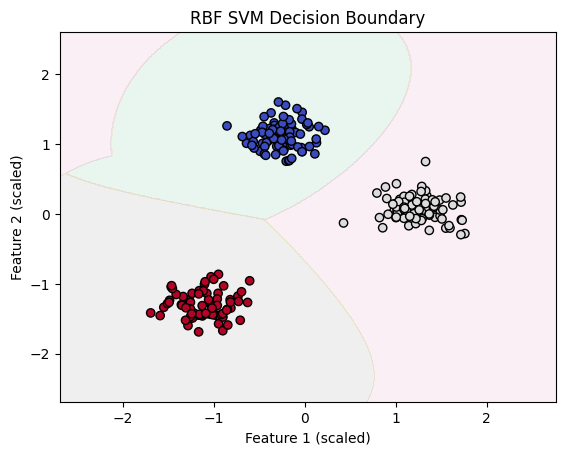

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

df=pd.read_csv('svm_multi.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=SVC(kernel='rbf')
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Confusion matrix: {confusion_matrix(y_test,y_pred)}')

x_min,x_max=X_train_scaled[:,0].min()-1,X_train_scaled[:,0].max()+1
y_min,y_max=X_train_scaled[:,1].min()-1,X_train_scaled[:,1].max()+1
xx,yy=np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))

Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3,cmap='Pastel2')
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap='coolwarm',edgecolors='k')
plt.title('RBF SVM Decision Boundary')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.savefig('plots/rbf_svm.png')
plt.show()

4. Simple Classification Tree
Dataset: dt_class.csv (200 rows, 2 features + label).
Task: Train a Decision Tree Classifier.
Visualize the tree and report test accuracy.

Accuracy: 0.8


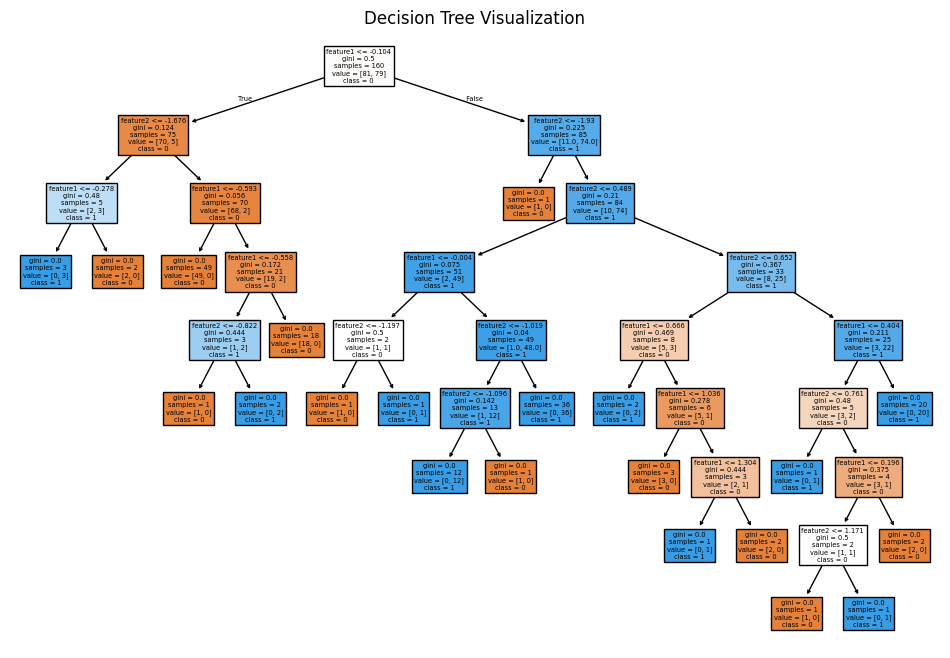

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df=pd.read_csv('dt_class.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

plt.figure(figsize=(12,8))
plot_tree(model,feature_names=X.columns,class_names=np.unique(y).astype(str),filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('plots/DT_classifier.png')
plt.show()

5. Effect of Tree Depth
Dataset: dt_depth.csv (200 rows, 2 features).
Task: Train Decision Tree with max_depth=2, 5, None. Compare train/test accuracy.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df=pd.read_csv('dt_depth.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

max_depth=[2,5,None]
for i in max_depth:
  model=DecisionTreeClassifier(max_depth=i,random_state=42)
  model.fit(X_train_scaled,y_train)

  y_train_pred=model.predict(X_train_scaled)
  y_test_pred=model.predict(X_test_scaled)

  train_accuracy=accuracy_score(y_train,y_train_pred)
  test_accuracy=accuracy_score(y_test,y_test_pred)

  print(f'Max_depth={i}: Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}')

Max_depth=2: Train accuracy: 0.88125, Test accuracy: 0.825
Max_depth=5: Train accuracy: 0.9375, Test accuracy: 0.775
Max_depth=None: Train accuracy: 1.0, Test accuracy: 0.7


6. Regression Tree
Dataset: dt_reg.csv (200 rows, x → y with some noise).
Task: Fit DecisionTreeRegressor to predict y.
Compare RMSE with depths 2, 5, None.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df=pd.read_csv('dt_reg.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

max_depth=[2,5,None]
for i in max_depth:
  model=DecisionTreeRegressor(max_depth=i,random_state=42)
  model.fit(X_train_scaled,y_train)

  y_train_pred=model.predict(X_train_scaled)
  y_test_pred=model.predict(X_test_scaled)

  train_rmse=root_mean_squared_error(y_train,y_train_pred)
  test_rmse=root_mean_squared_error(y_test,y_test_pred)

  print(f'Max Depth={i}: Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

Max Depth=2: Train RMSE: 27.671001191313376, Test RMSE: 40.53421671964252
Max Depth=5: Train RMSE: 11.712080794798931, Test RMSE: 19.911134124032053
Max Depth=None: Train RMSE: 0.0, Test RMSE: 23.79596828836386
